In [245]:
import numpy as np
import matplotlib.pyplot as plt

In [246]:
# Assume the data below is your input data.
# Solve the problem using second order polynomial function
# and the closed-formed solution

x = np.array([[0],
              [1],
              [2],
              [3],
              [4]])

y = np.array([[0],
              [5],
              [14],
              [27],
              [44]])

In [247]:
# The first thing is to define the phi matrix and the initial weights
phi = np.array([[0,0,1],
              [1,1,1],
              [4,2,1],
              [9,3,1],
              [16,4,1]])

y = np.array([[0],
              [5],
              [14],
              [27],
              [44]])

w = np.array([[1], [1], [1]])

In [248]:
# Let's give the user the chance to enter the learning rate and the
# number of iterations
lr = float(input('Enter the learning rate\n'))
niter = int(input('Enter the number of iterations\n'))

Enter the learning rate
0.01
Enter the number of iterations
50


In [249]:
loss_hist = [] # Recording the loss over iterations

In [250]:
weight_hist = [] # Recording the weights over iterations

In [251]:
# Determine the number of samples we have by extracting the number of rows
# of the phi matrix
ns = phi.shape[0]
print(f'Number of samples {ns}\n')

Number of samples 5



Below is the formula for the loss

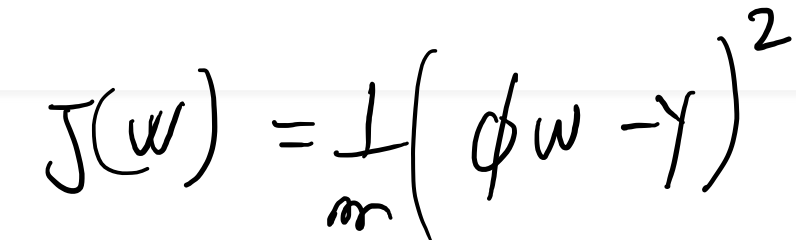

Below is the formula for the gradient
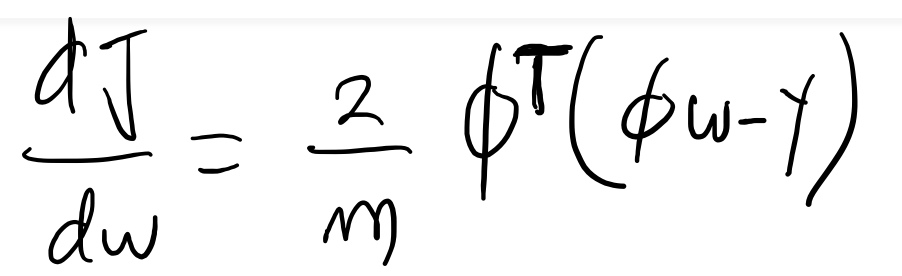

In [252]:
# Make the training loop. This is where we train the regression algorithm
for i in range(niter):
  loss = np.mean((phi @ w - y)**2)
  loss_hist.append(loss)

  # Let's calculate the gradient and update the weights
  gradient = (2/ns) * phi.T @ ((phi @ w - y))

  # Update weights
  w = w - lr * gradient

  # Store current weights
  weight_hist.append(w.flatten())

  # Print the loss every 10 iterations
  if i % 10 == 0:
    print(f"Iteration {i}, Loss: {loss}")



Iteration 0, Loss: 155.8
Iteration 10, Loss: 0.4066667919249795
Iteration 20, Loss: 0.3877985008808985
Iteration 30, Loss: 0.3707342647000386
Iteration 40, Loss: 0.35464788403853964


Remember that the predictions look like this
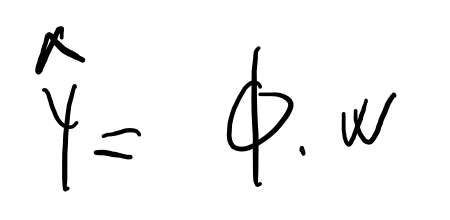

In [253]:
# Final weights and predictions
print("Final weights:")
print(w)
final_predictions = phi @ w # Remember that y = phi w
print("Final predictions:")
print(final_predictions)

Final weights:
[[2.31470073]
 [1.57473526]
 [1.044241  ]]
Final predictions:
[[ 1.044241  ]
 [ 4.933677  ]
 [13.45251445]
 [26.60075337]
 [44.37839376]]


In [254]:
# Convert weight history to a numpy array for plotting
weight_history = np.array(weight_hist) # It was a list now it's an array, so I can plot it
weight_history.shape
# print(weight_history)

(50, 3)

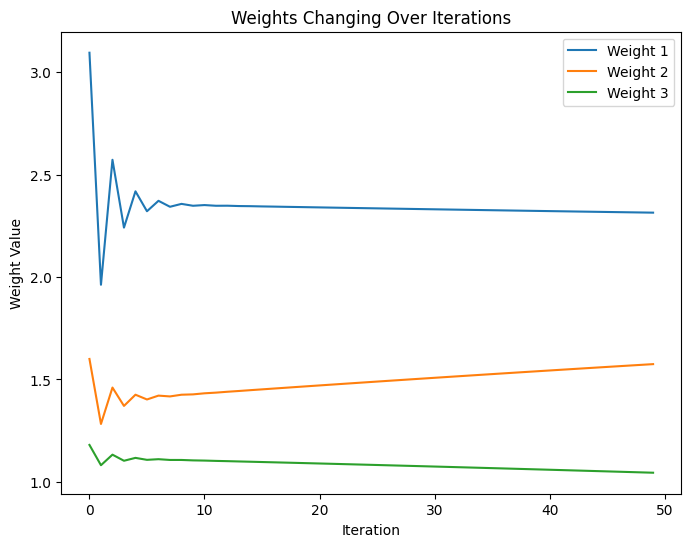

In [255]:
# Plot the weights changing with iterations
plt.figure(figsize=(8, 6))
# Here we're plotting both w1, w2 and w3, and seeing how they change with the number of
# iterations
for i in range(weight_history.shape[1]):
    plt.plot(range(niter), weight_history[:, i], label=f'Weight {i + 1}')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weights Changing Over Iterations')
plt.legend()
# plt.grid(True)
plt.show()

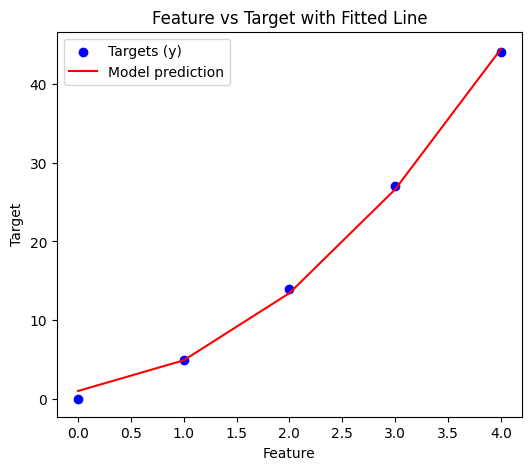

In [256]:
# -------- Plot features vs targets --------
# Feature is phi[:,0] (the first column, not the bias)
x = phi[:, 1]
y_true = y.flatten()
y_pred = final_predictions.flatten()

plt.figure(figsize=(6, 5))
plt.scatter(x, y_true, color='blue', label='Targets (y)')
plt.plot(x, y_pred, color='red', label='Model prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Feature vs Target with Fitted Line')
plt.legend()
plt.show()

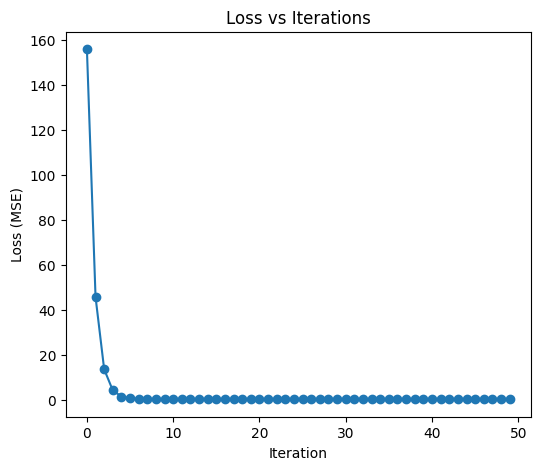

In [257]:
# ---- Plot loss over iterations ----
plt.figure(figsize=(6, 5))
plt.plot(range(niter), loss_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations')
plt.show()

Remember that the closed-form solution looks like this

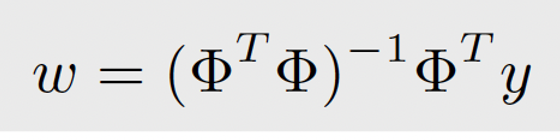

In [266]:
# Now using the closed-form solution

first = phi.T @ phi
second = np.linalg.inv(first)
third = phi.T @ y
w_cl = second @ third

In [268]:
# Final weights and predictions
print("Exact weights:")
print(w_cl)
y_closed = phi @ w_cl
print("Closed_form results:")
print(y_closed)
print(y_true)
print(y_pred)

Exact weights:
[[2.0000000e+00]
 [3.0000000e+00]
 [4.4408921e-16]]
Closed_form results:
[[4.4408921e-16]
 [5.0000000e+00]
 [1.4000000e+01]
 [2.7000000e+01]
 [4.4000000e+01]]
[ 0  5 14 27 44]
[ 1.044241    4.933677   13.45251445 26.60075337 44.37839376]


In [269]:
print(phi[:,1].shape, y.shape, y_closed.shape)
print(phi[:,1].shape, y.flatten().shape, y_closed.flatten().shape)

(5,) (5, 1) (5, 1)
(5,) (5,) (5,)


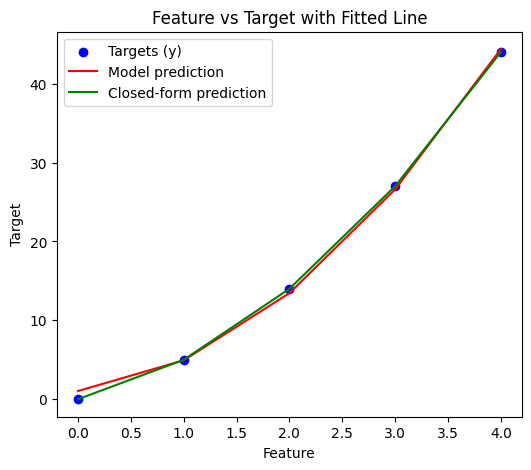

In [270]:
# -------- Plot features vs targets vs closed-form--------
# Feature is phi[:,1] (the second column, not the bias)
x = phi[:, 1]
y_true = y.flatten()
y_pred = final_predictions.flatten()
y_closed = y_closed.flatten()

plt.figure(figsize=(6, 5))
plt.scatter(x, y_true, color='blue', label='Targets (y)')
plt.plot(x, y_pred, color='red', label='Model prediction')
plt.plot(x, y_closed, color='green', label='Closed-form prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Feature vs Target with Fitted Line')
plt.legend()
plt.show()